[View in Colaboratory](https://colab.research.google.com/github/zacateras/nn-nbirds/blob/master/report_colab.ipynb)

First Name Last Name 1 \
First Name Last Name 2 \
First Name Last Name 3 \

# Projekt z przedmiotu SNR 2018L - sprawozdanie nr 1


---


In [1]:
# If python3 is not loaded kill the hypervisor
# ! kill -9 -1
import sys
sys.version

'3.6.3 (default, Oct  3 2017, 21:45:48) \n[GCC 7.2.0]'

In [49]:
% cd ~

# Remove the environment
! if [ -d "nn-nbirds" ]; then rm -rf "nn-nbirds"; fi
# ! pip freeze | xargs pip uninstall -y

# Build the environment 
! git clone https://github.com/zacateras/nn-nbirds.git
% cd ./nn-nbirds
! pip install -r requirements.txt
# Those below fixes the issue with keras @ Colab
! pip install Pillow==4.0.0
! pip install PIL
! pip install image

/content
Cloning into 'nn-nbirds'...
remote: Counting objects: 78, done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 78 (delta 36), reused 58 (delta 20), pack-reused 0
Unpacking objects: 100% (78/78), done.
/content/nn-nbirds
Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
  Using cached https://files.pythonhosted.org/packages/5f/4b/8b54ab9d37b93998c81b364557dff9f61972c0f650efa0ceaf470b392740/Pillow-5.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0
Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


In [50]:
# Download the dataset
! ./download.sh

--2018-04-26 23:22:44--  https://www.dropbox.com/s/fi2g3zxsn0pdmn1/nbirds.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/nnECdYBQ3U1pnbwaaNcOEwPLkMFSlaLt6tEGAa4DikwGm8Drtr7z8qGQUgcHPkea/file [following]
--2018-04-26 23:22:45--  https://dl.dropboxusercontent.com/content_link/nnECdYBQ3U1pnbwaaNcOEwPLkMFSlaLt6tEGAa4DikwGm8Drtr7z8qGQUgcHPkea/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.9.6, 2620:100:601f:6::a27d:906
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.9.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 623160299 (594M) [application/zip]
Saving to: ‘/content/nn-nbirds/data/nbirds.zip’

/content/nn-nbirds/ 100%[===================>] 594.29M  36.0MB/s    in 18s     

2

## 1. Analiza bazy danych
Dostarczona baza danych zawiera 48562 zdjęć ptaków należących do 555 klas (gatunków). Rozkład liczby zdjęć należących do poszczególnych klas przedstawia Wykres 1. \
![Wykres 1](http://mion.elka.pw.edu.pl/~mchmielo/tmp/wykres1.png) \
Ponieważ poszczególne klasy odpowiadają konkretnym gatunkom ptaków, możliwym było zbudowanie hierarchii klas przypominającej biologiczną systematykę organizmów. Taka hierarchia została dostarczona wraz z bazą, a jej drzewo w formie graficznej przedstawia wygenerowany w trakcie prac nad projektem obraz w formacie SVG dostępny w postaci poniższego linku: \
[Hierarchia klas ptaków](http://mion.elka.pw.edu.pl/~mchmielo/tmp/nbirds_hierarchy.svg) \
Wszystkich klas w hierarchii jest 1011. Oprócz informacji na temat przynależności zdjęć do poszczególnych klas oraz samej hierarchii klas, baza dostarcza informacje na temat Autorów oraz rozmiarów zdjęć. Ważną informacją zawartą w bazie są rozmiary *bounding box* czyli rozmiarów najmniejszych prostokątów w których zawarte są w całości obiekty będące przedstawicielami poszczególnych gatunków ptaków na badanych zdjęciach. Pozwoliło to znacznie ograniczyć rozmiar danych do klasyfikatora. Nazwy plików graficznych są powiązane z wyżej opisanymi danymi za pomocą unikalnych identyfikatorów *image_guid*. Zależności pomiędzy plikami bazy dobrze odzwierciedla Diagram 1. \
 \
**Diagram 1** Wizualizacja powiązań plików bazy danych ![Diagram 1](https://raw.githubusercontent.com/zacateras/nn-nbirds/master/assets/dataset.png) \


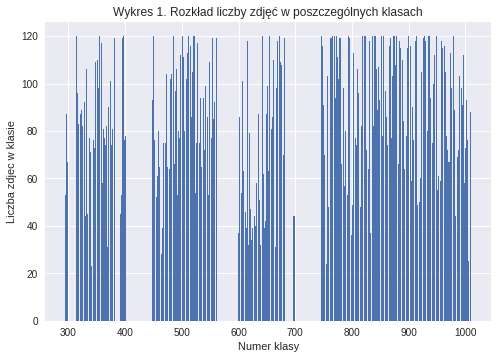

In [67]:
import matplotlib.pyplot as plt
import numpy as np
#show database content chart

data = np.genfromtxt('data/image_class_labels.txt', delimiter=' ', usecols = (1),
                    dtype=int)
          
unique, counts = np.unique(data, return_counts=True)
plt.bar(unique, counts)
plt.ylabel('Liczba zdjec w klasie')
plt.xlabel('Numer klasy')
plt.title('Wykres 1. Rozkład liczby zdjęć w poszczególnych klasach')
plt.show()

In [0]:
from preprocess import *

# preprocess and load txt ds metadata
ds_meta = build_ds_meta()

In [52]:
for ds_meta_item in ds_meta:
    print('Quantity of %s: %s' % (ds_meta_item, ds_meta[ds_meta_item].count()[0]))

Quantity of bounding_boxes: 48562
Quantity of classes: 1011
Quantity of hierarchy: 1010
Quantity of image_class_labels: 48562
Quantity of images: 48562
Quantity of photographers: 48562
Quantity of sizes: 48562


In [53]:
class Transform:
  def __init__(self, img, guid, ds_meta):
    self.img = img
    self.guid = guid
    self.ds_meta = ds_meta
  
  def resize(self):
      img = cv2.resize(self.img, (150, 150))
      return self

  def greyscale(self):
      img = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
      return self

  def gabor_filter(self):
      g_kernel = cv2.getGaborKernel((15, 15), 0.66, np.pi/8, 1.3, 0.5, 0, ktype=cv2.CV_32F)

      img = cv2.normalize(cv2.filter2D(self.img, cv2.CV_8UC3, g_kernel),
                           None,
                           alpha=0,
                           beta=255,
                           norm_type=cv2.NORM_MINMAX,
                           dtype=cv2.CV_32F)
      
      return self

# BASE               SET_A
# + Bounding box  => SET_A_BB               (del)
# + Gabor filter  => SET_A_BB_GF            (del)
# + TVT splitting => SET_A_BB_GF_train
#                    SET_A_BB_GF_validation
#                    SET_A_BB_GF_test

apply(bounding_box, 'data/SET_A', 'data/SET_A_BB', ds_meta)
apply(lambda img, guid, dsm: Transform(img, guid, ds_meta).resize().greyscale().gabor_filter().img, 'data/SET_A_BB', 'data/SET_A_BB_GF', ds_meta)
apply_tvt_split('data/SET_A_BB_GF', train=0.7, test=0.2, validation=0.1)

TypeError: ignored

In [0]:
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense

In [45]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [46]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9452461725818243769, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11288962663
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6373910734070522758
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [48]:
batch_size = 32

train_labels = os.listdir('data/SET_A_BB_GF_train')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/SET_A_BB_GF_train',
    target_size=(150, 150),
    batch_size=batch_size,
    color_mode='grayscale')

validation_generator = train_datagen.flow_from_directory(
    'data/SET_A_BB_GF_validation',
    target_size=(150, 150),
    batch_size=batch_size,
    color_mode='grayscale')

model = Sequential()
model.add(Flatten(input_shape=(150, 150, 1))) 
model.add(Dense(4))
model.add(Dense(8))
model.add(Dense(len(train_labels)))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=20)

Found 2103 images belonging to 50 classes.
Found 300 images belonging to 50 classes.
Epoch 1/50
62/62 [==============================] - 19s 299ms/step - loss: 4.0935 - acc: 0.0207 - val_loss: 4.2036 - val_acc: 0.0133
Epoch 2/50
62/62 [==============================] - 18s 286ms/step - loss: 4.0398 - acc: 0.0217 - val_loss: 4.0498 - val_acc: 0.0217
Epoch 3/50
62/62 [==============================] - 17s 276ms/step - loss: 4.0275 - acc: 0.0257 - val_loss: 3.9449 - val_acc: 0.0350
Epoch 4/50
62/62 [==============================] - 16s 260ms/step - loss: 3.9601 - acc: 0.0297 - val_loss: 4.0410 - val_acc: 0.0200
Epoch 5/50
29/62 [=============>................] - ETA: 4s - loss: 4.0089 - acc: 0.0205

62/62 [==============================] - 16s 262ms/step - loss: 3.9356 - acc: 0.0247 - val_loss: 3.9238 - val_acc: 0.0233
Epoch 6/50
62/62 [==============================] - 16s 264ms/step - loss: 3.9296 - acc: 0.0188 - val_loss: 3.8714 - val_acc: 0.0317
Epoch 7/50
62/62 [==============================] - 16s 259ms/step - loss: 3.8602 - acc: 0.0267 - val_loss: 3.8962 - val_acc: 0.0217
Epoch 8/50
47/62 [=====================>........] - ETA: 2s - loss: 3.8724 - acc: 0.0255

KeyboardInterrupt: ignored